In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

plt.rc(
    "figure",
    figsize=(12,5),
    autolayout = True
)

plt.rc(
    "axes",
    labelsize = 16,
    labelweight = 'bold',
    titlesize = 18,
    titleweight = 'bold',
    titlepad = 10
)

plot_params = dict(
        color = '0.75',
        markeredgecolor = '0.25',
        markerfacecolor = '0.25',
        style = '.-',
        legend = True
)

%config InlineBackend.figure_format = 'retina'

In [2]:
tesla_df = pd.read_csv('Downloads/TSLA.csv')

tesla_df.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [3]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df = tesla_df.set_index('Date')
#view the data
tesla_df.head()

Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

<AxesSubplot:xlabel='Date'>

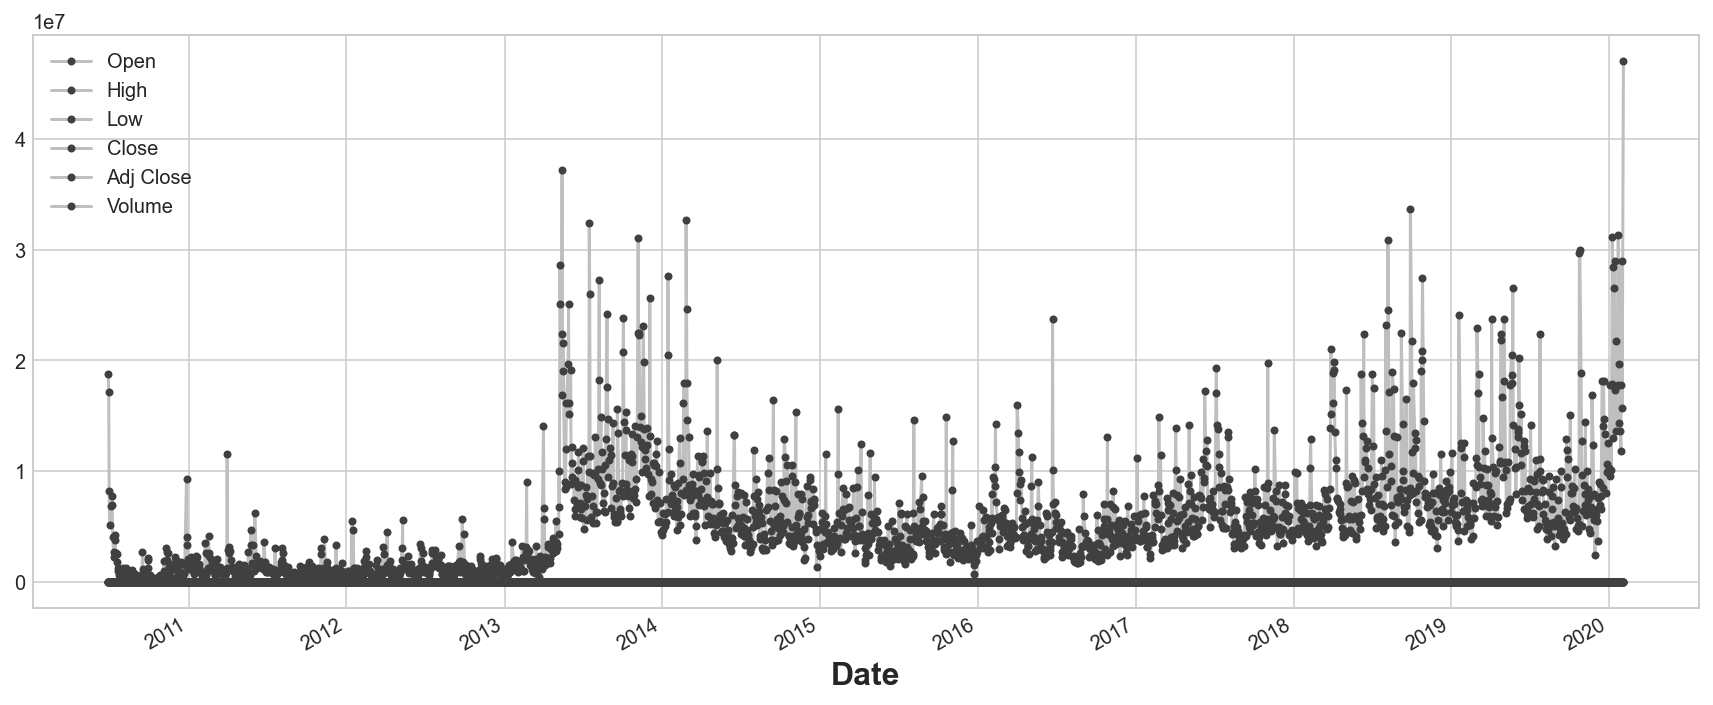

In [4]:
tesla_df.plot(**plot_params)

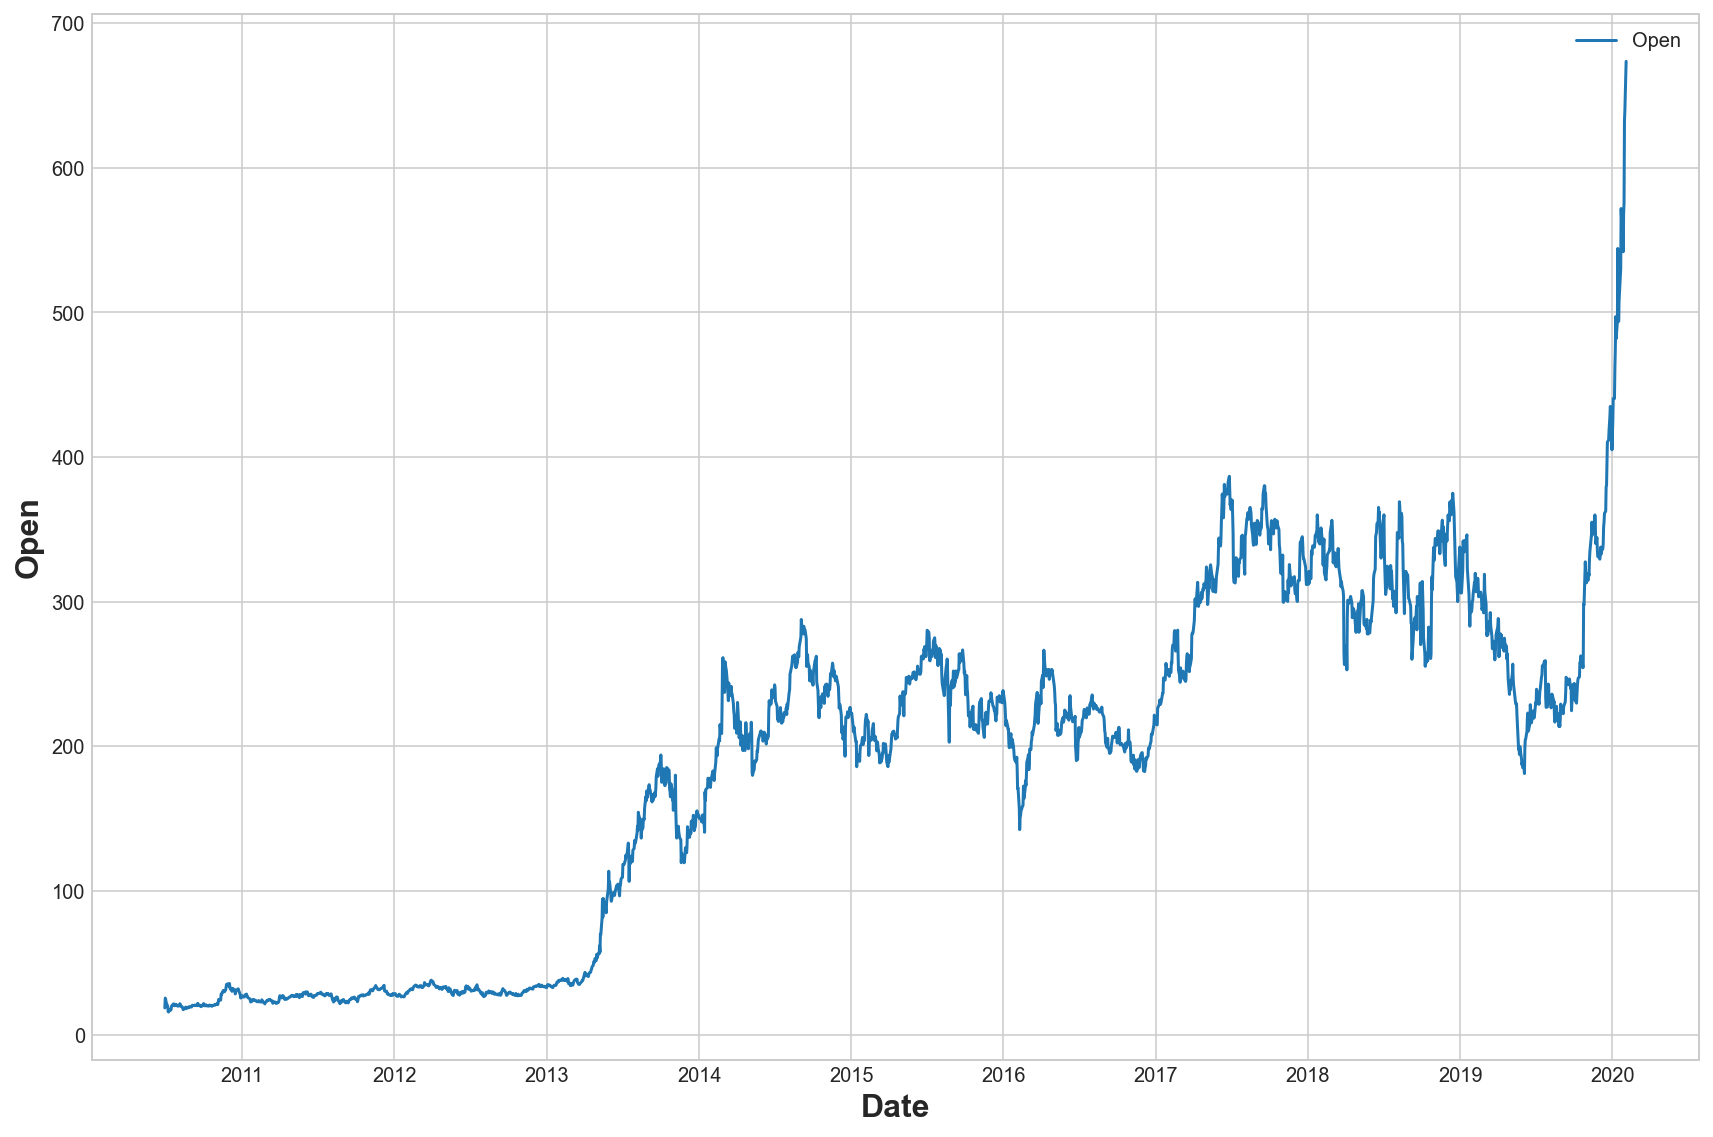

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data = tesla_df['Open'], label = "Open")
plt.show()

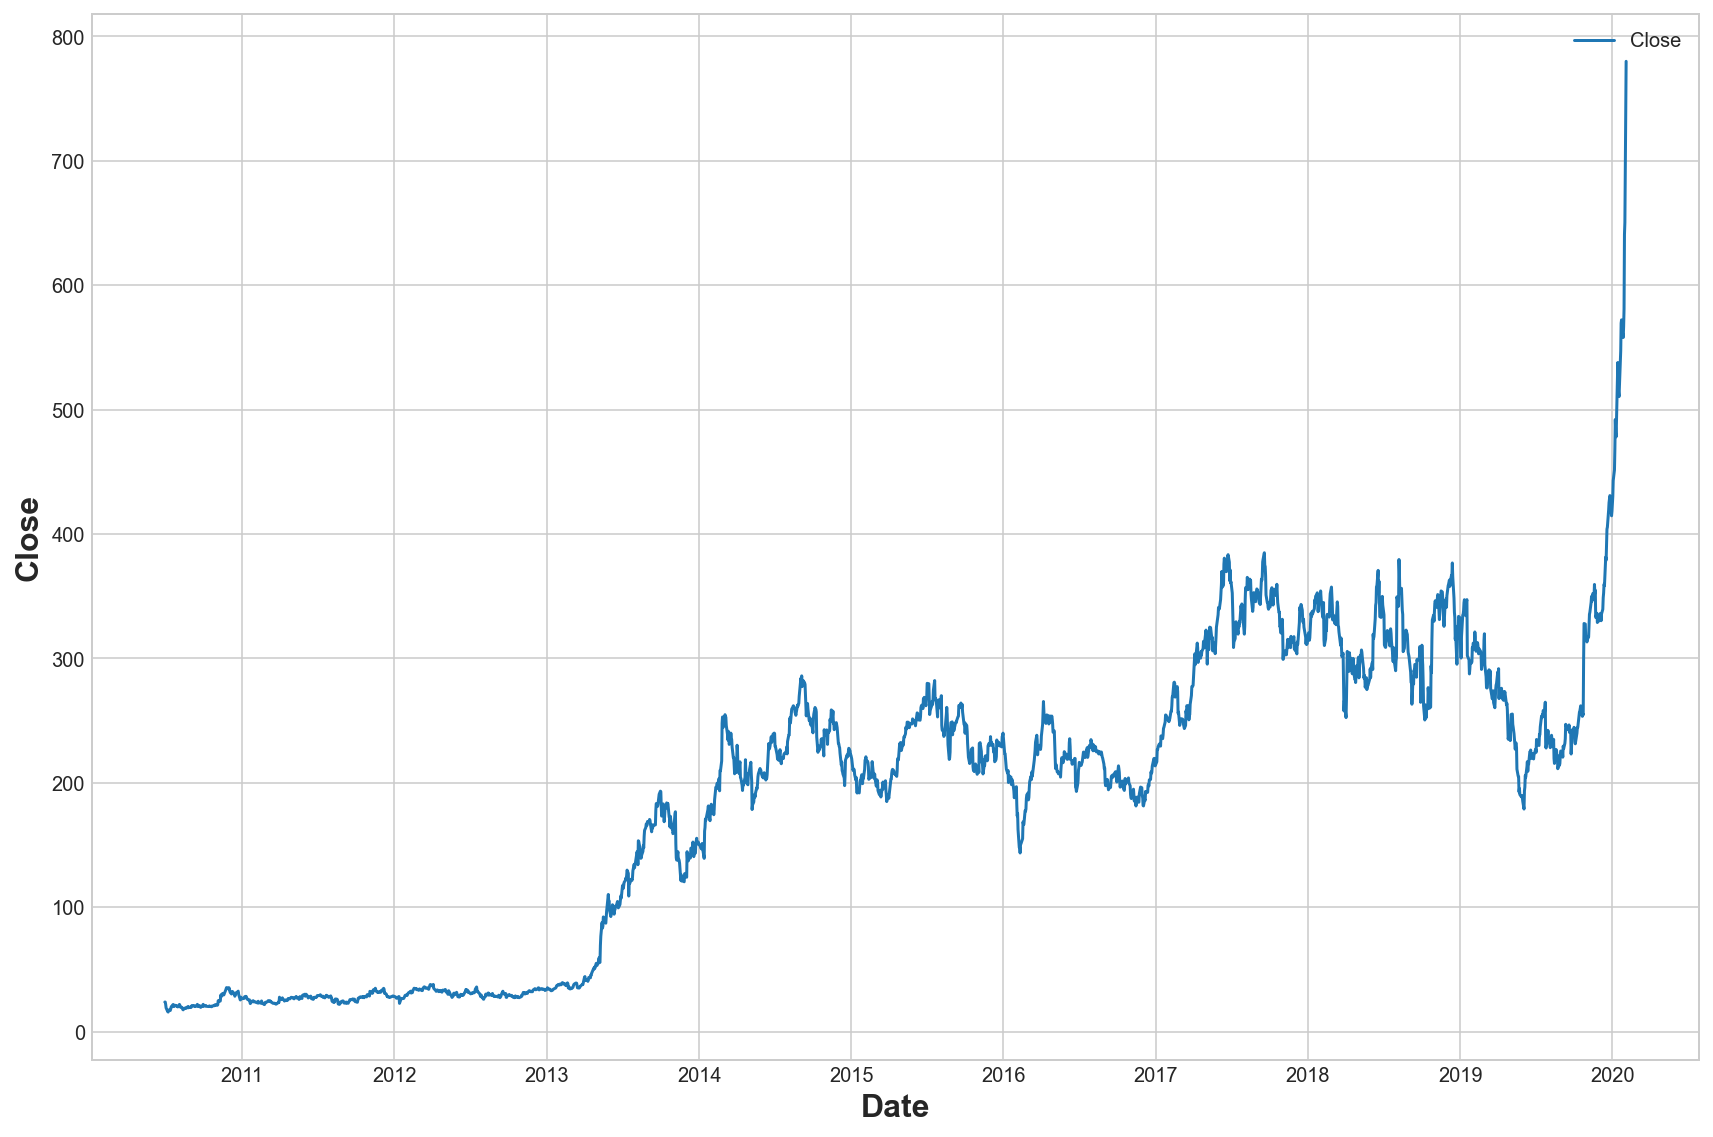

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data = tesla_df['Close'], label = 'Close')
plt.show()

Text(0.5, 1.0, 'Amounts of Stock During Opening and Close')

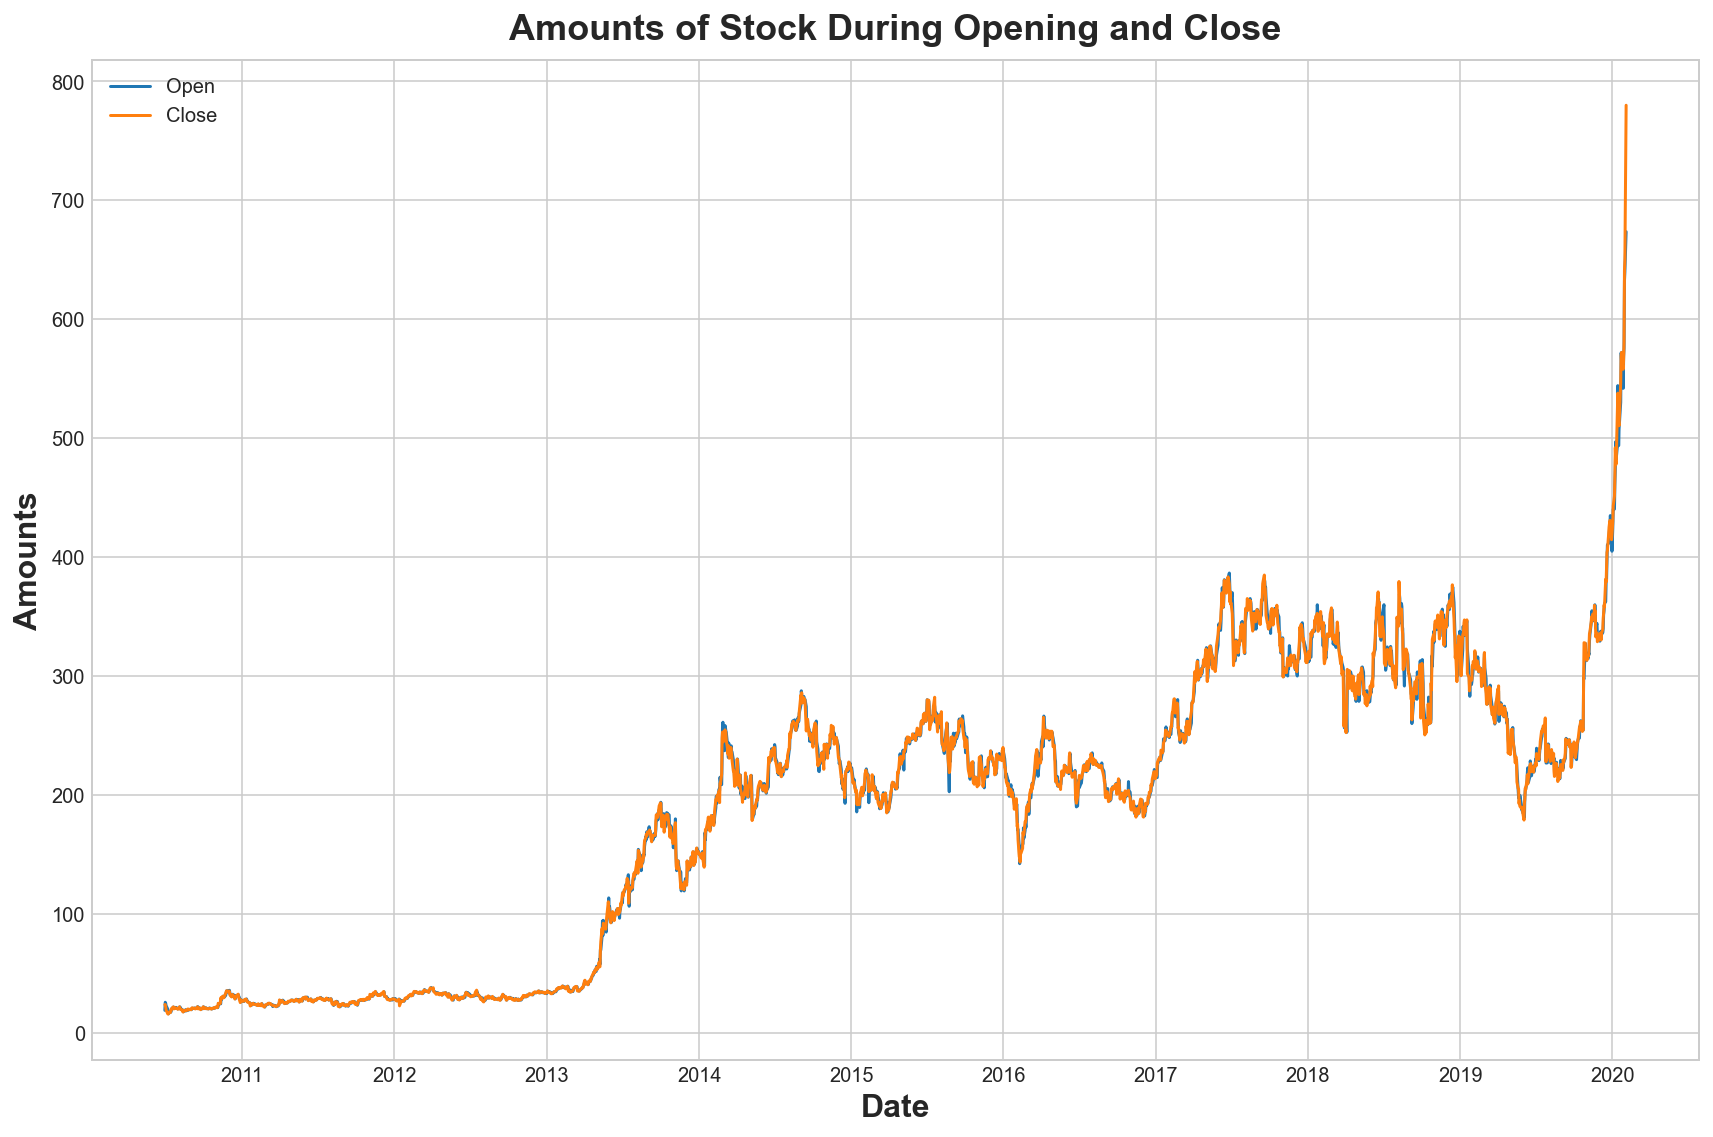

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data = tesla_df['Open'], label = 'Open')
sns.lineplot(data = tesla_df['Close'], label = "Close")
plt.ylabel('Amounts')
plt.title('Amounts of Stock During Opening and Close')

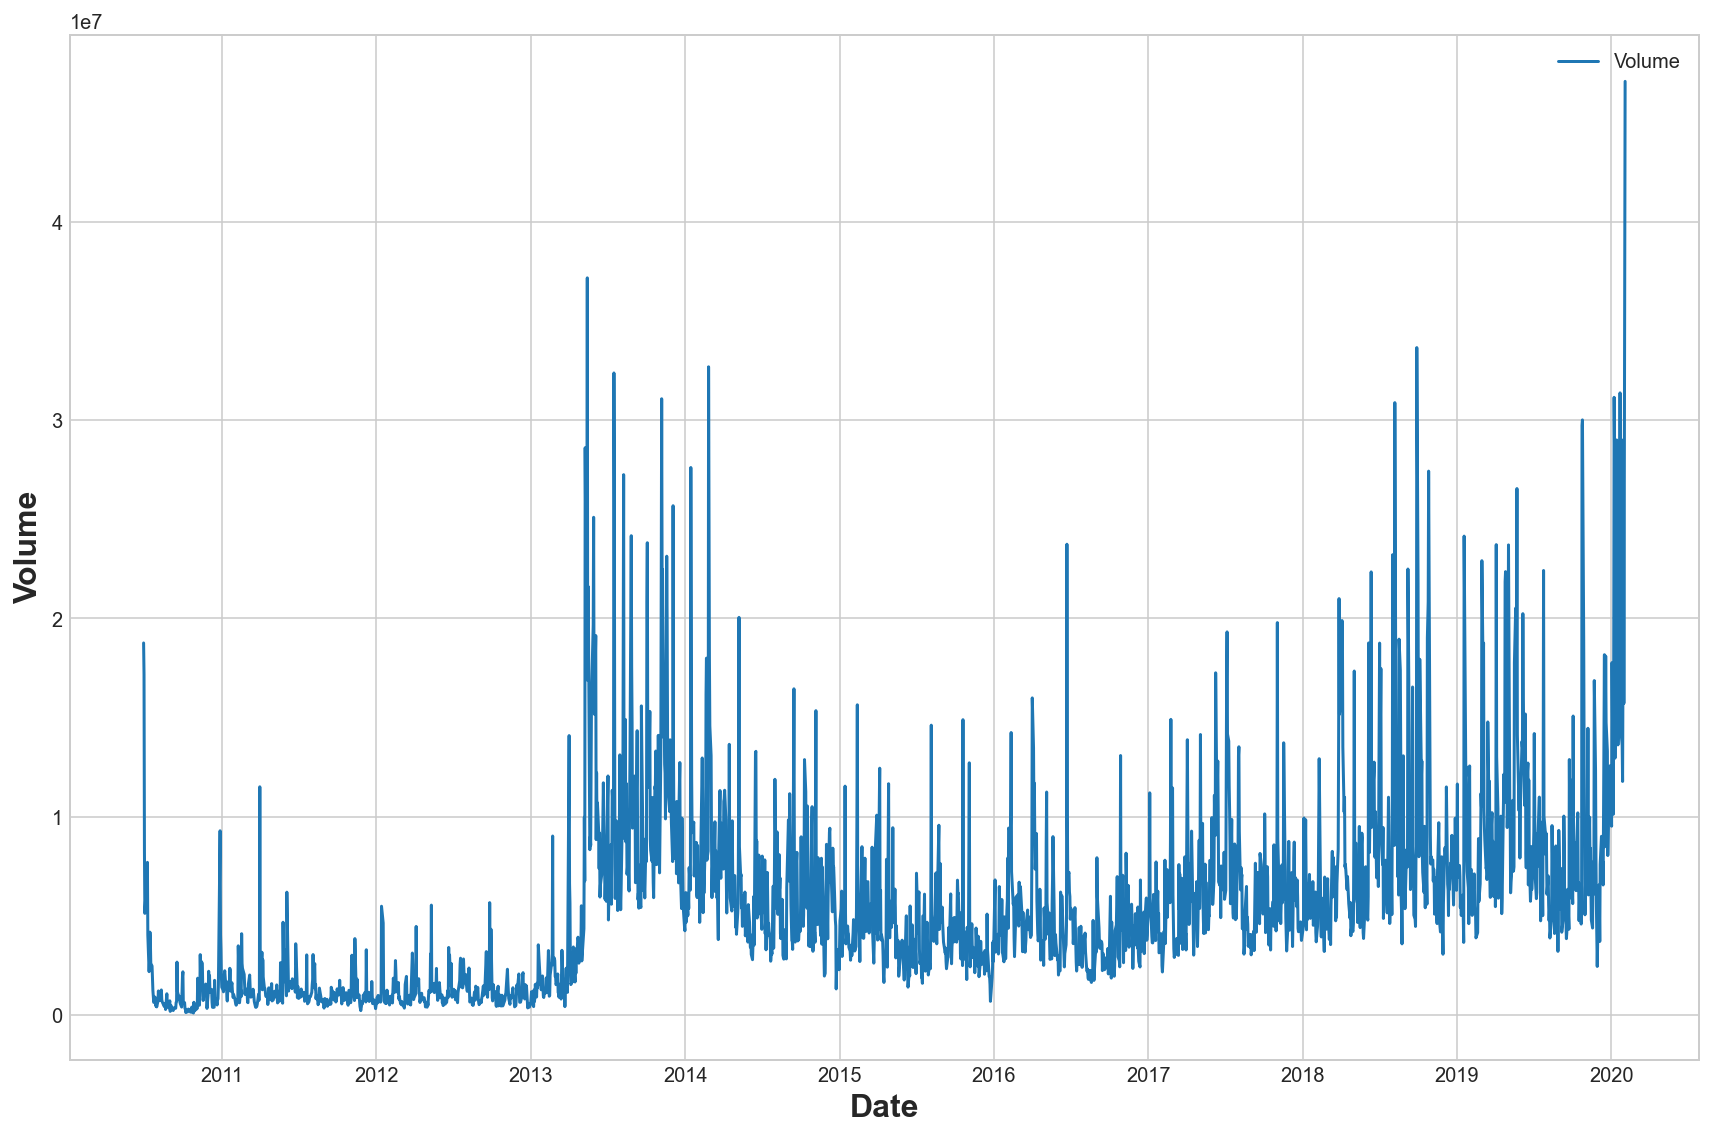

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data = tesla_df['Volume'], label = 'Volume')
plt.show()

In [9]:
import plotly.express as px
px.box(tesla_df['Close'])

In [10]:
tesla_df.describe()

Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035004   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07

In [11]:
q = tesla_df['Close'].quantile(0.99)
data = tesla_df[tesla_df['Close'] <= q]

In [12]:
px.box(data['Close'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

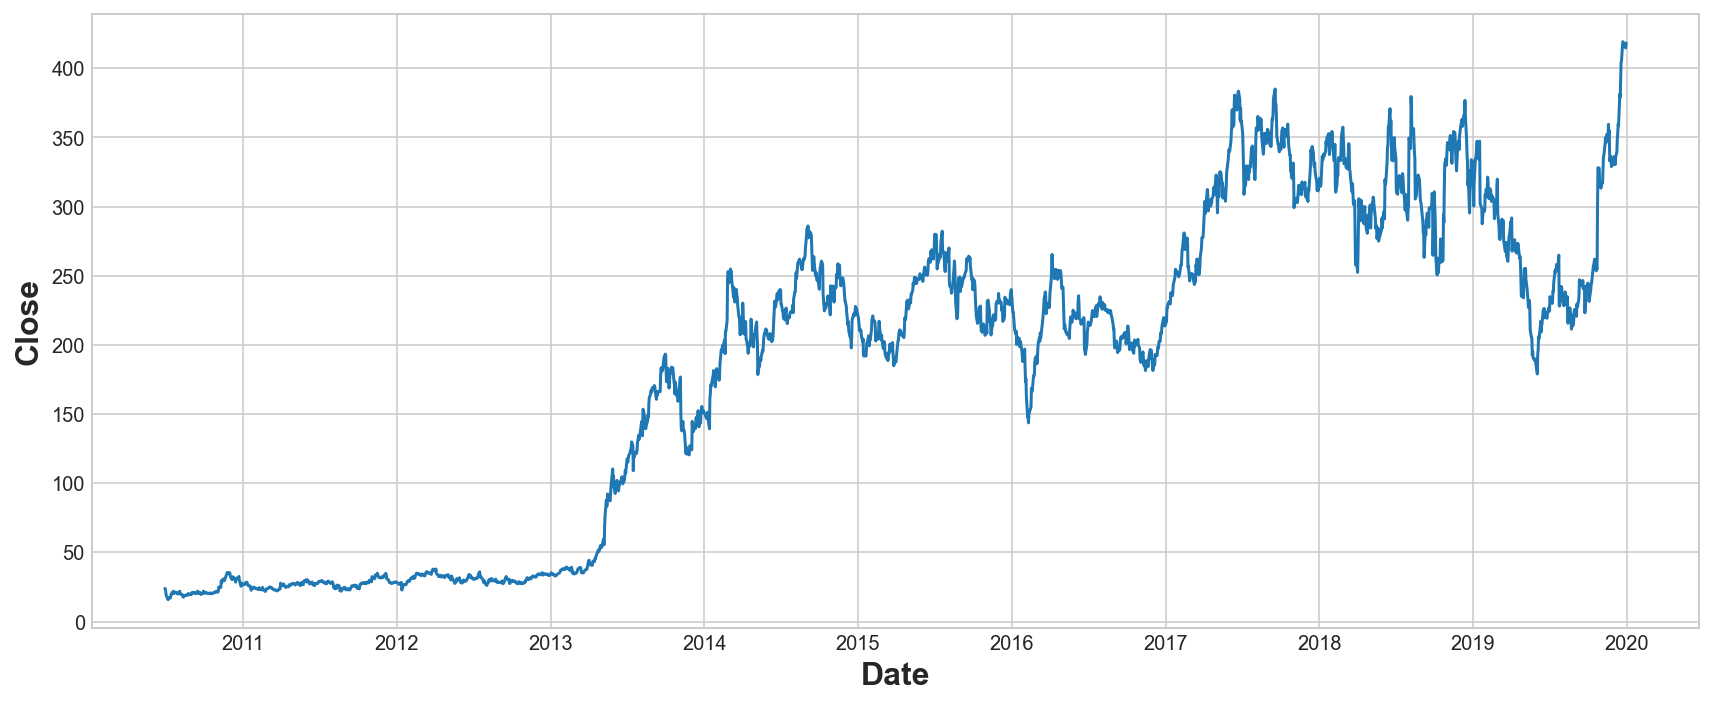

In [13]:
sns.lineplot(data = data['Close'])

In [14]:
data.head()

Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [15]:
data.resample('M').mean()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-30   22.395001   27.710000   20.420000   23.860000   23.860000   
2010-07-31   20.073334   20.640000   18.816190   19.558095   19.558095   
2010-08-31   19.545455   19.910000   19.080455   19.510909   19.510909   
2010-09-30   20.779048   21.276190   20.309048   20.740476   20.740476   
2010-10-31   20.723333   20.992857   20.425714   20.713333   20.713333   
...                ...         ...         ...         ...         ...   
2019-08-31  225.945456  228.985001  221.659091  225.102727  225.102727   
2019-09-30  237.070501  241.225499  233.058499  237.261498  237.261498   
2019-10-31  263.945218  270.003476  260.628263  266.354784  266.354784   
2019-11-30  338.807001  342.578999  333.889499  338.300000  338.300000   
2019-12-31  365.963888  373.457223  362.561666  369.167779  369.167779   

                  Volume  
Date                      
2010-06-30  1.797670e+07  
2010-07-31  3.075038e+06  
2010-08-31  6.835545e+05  
2010-09-30  8.593286e+05  
2010-10-31  3.118000e+05  
...                  ...  
2019-08-31  6.079750e+06  
2019-09-30  6.788765e+06  
2019-10-31  9.912287e+06  
2019-11-30  7.888540e+06  
2019-12-31  9.913650e+06  

[115 rows x 6 columns]

<AxesSubplot:xlabel='Date', ylabel='Close'>

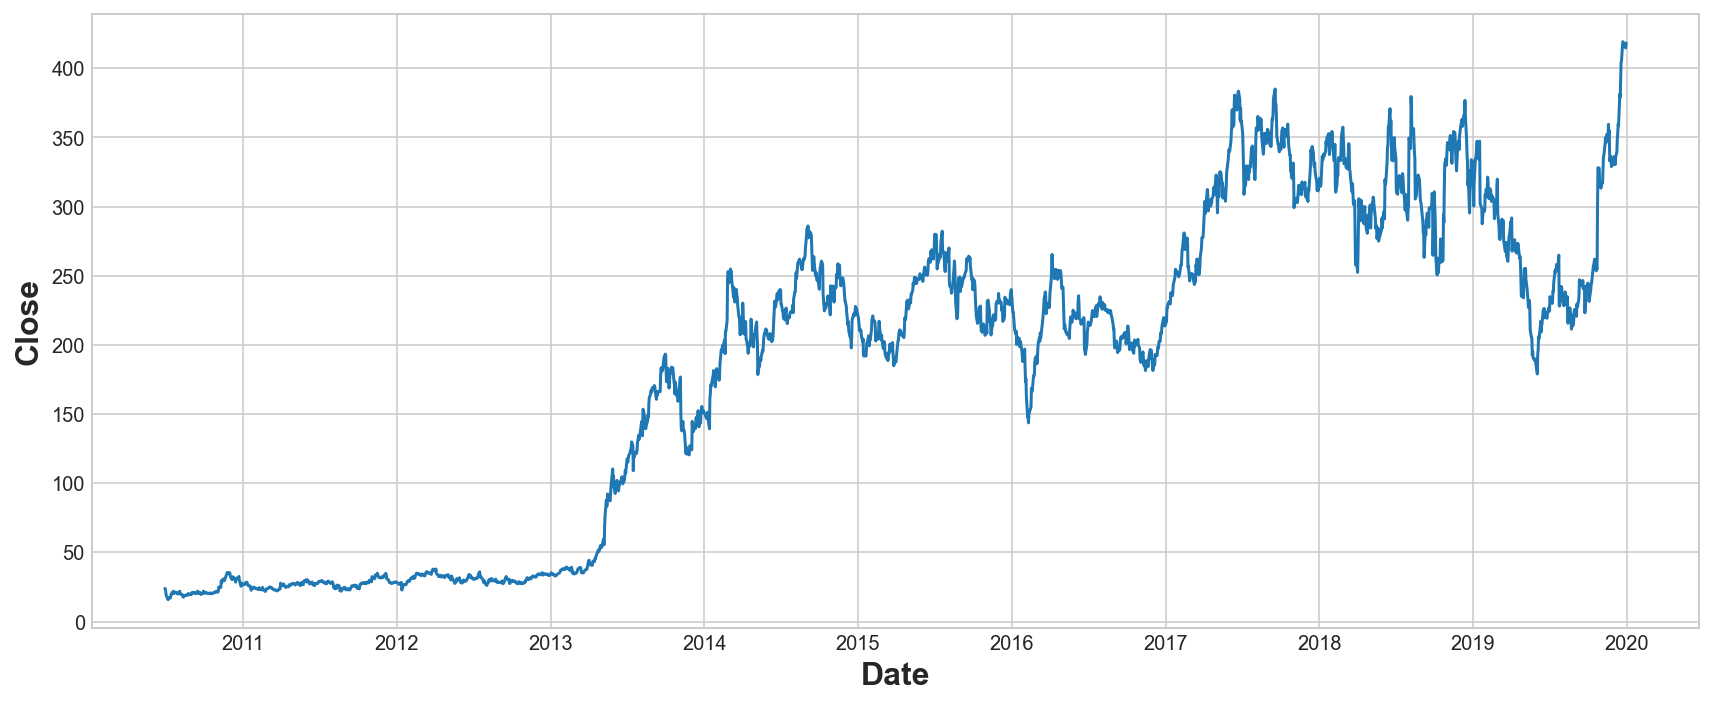

In [16]:
sns.lineplot(data = data['Close'])

The skewness of the distribution is:  -0.2156328774210565


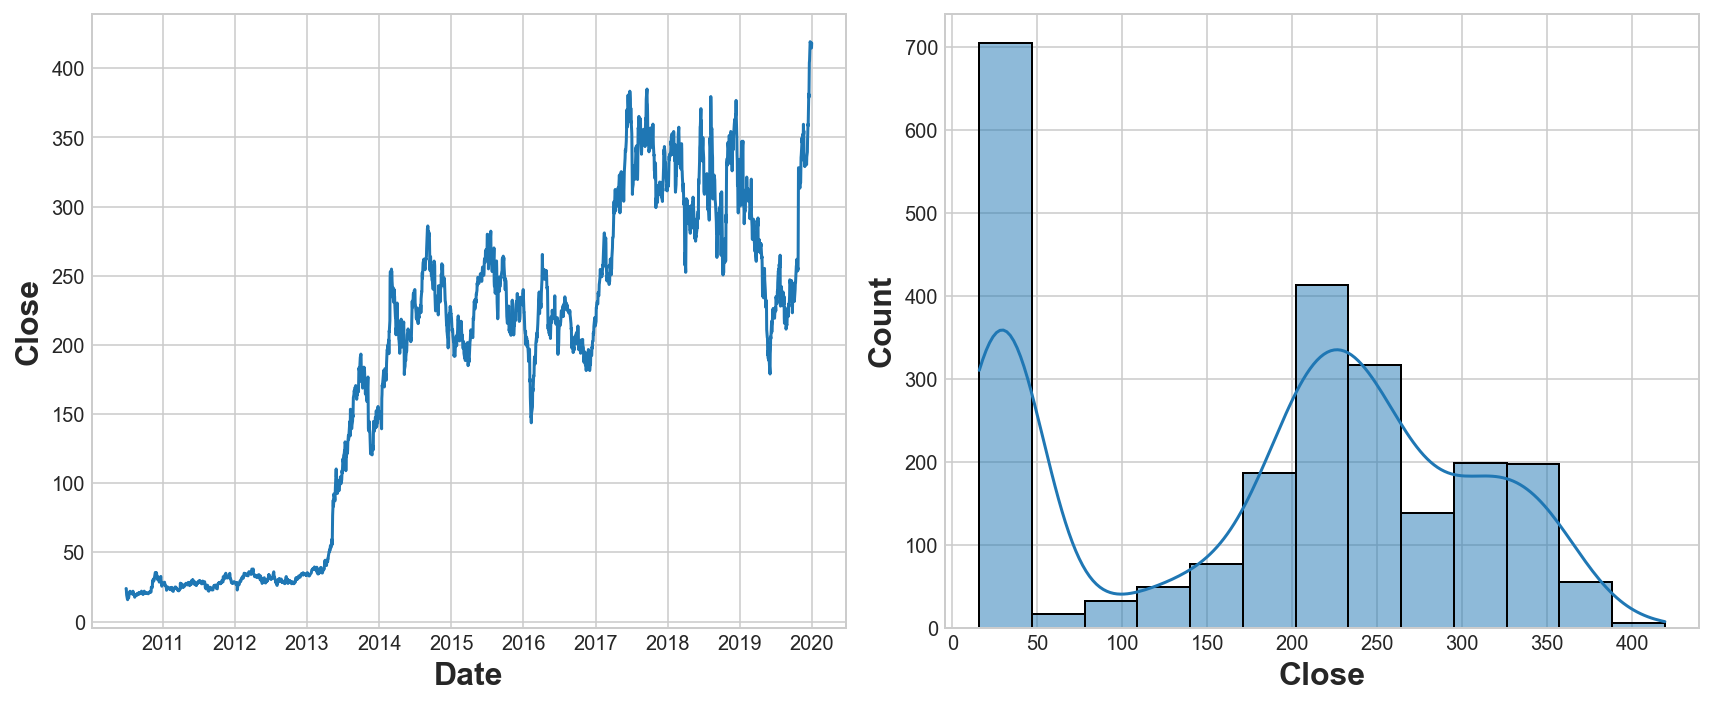

In [17]:
def hist_plot(ts):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
    sns.histplot()
    sns.lineplot(data = ts, ax = ax0)
    sns.histplot(data = ts, kde =True, ax = ax1)
    print('The skewness of the distribution is: ', ts.skew())
    
hist_plot(data['Close'])

In [18]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'box-cox', standardize=False)
box_cox_close = pd.Series(pt.fit_transform(data['Close'].to_numpy().reshape(-1, 1)).ravel())

The skewness of the distribution is:  -0.40238645320231115


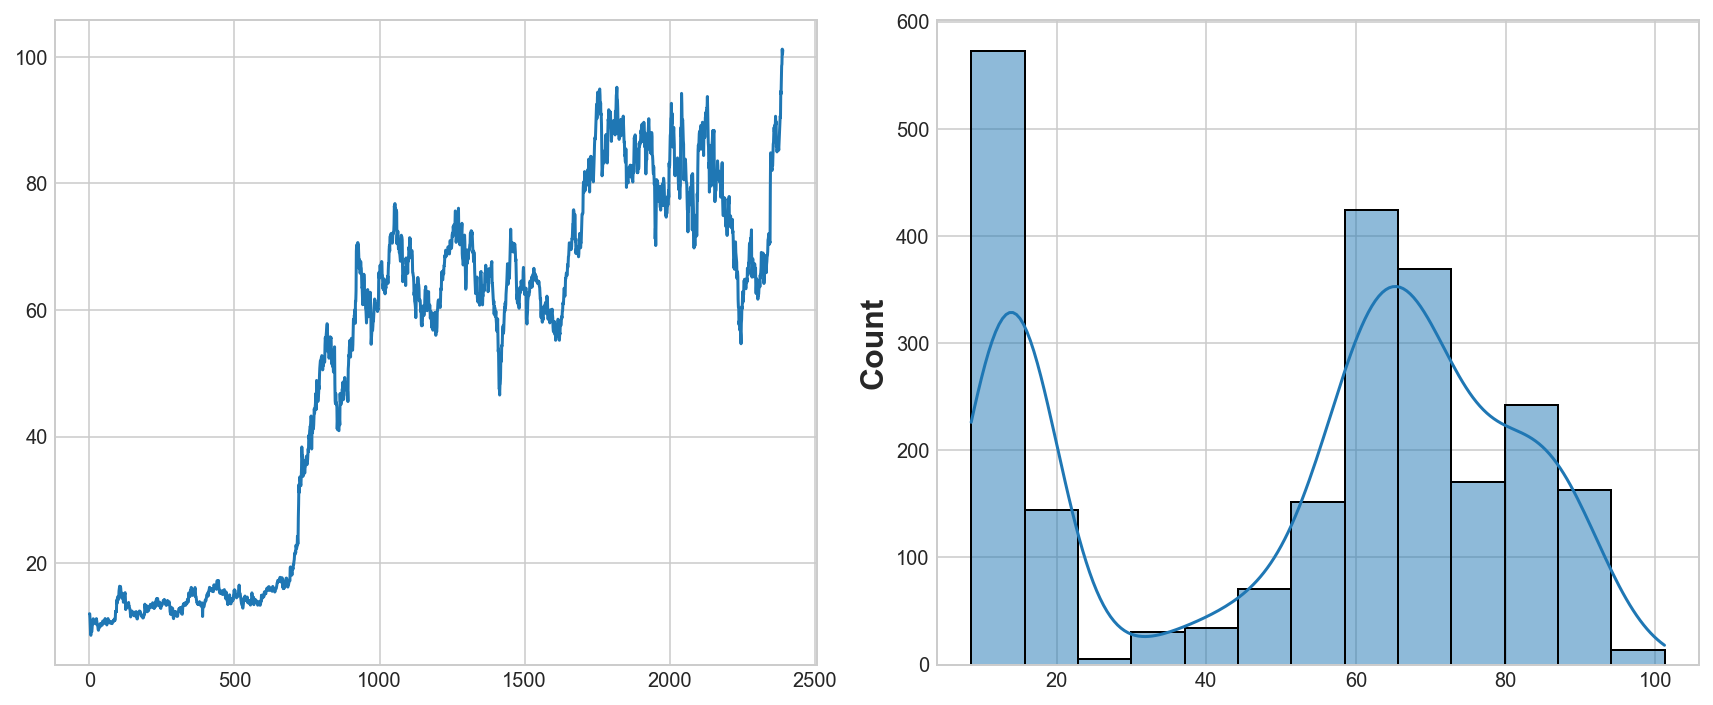

In [19]:
hist_plot(box_cox_close)

In [20]:
df = data.copy()
df.head()

Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [21]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
data = data.resample('M').mean()

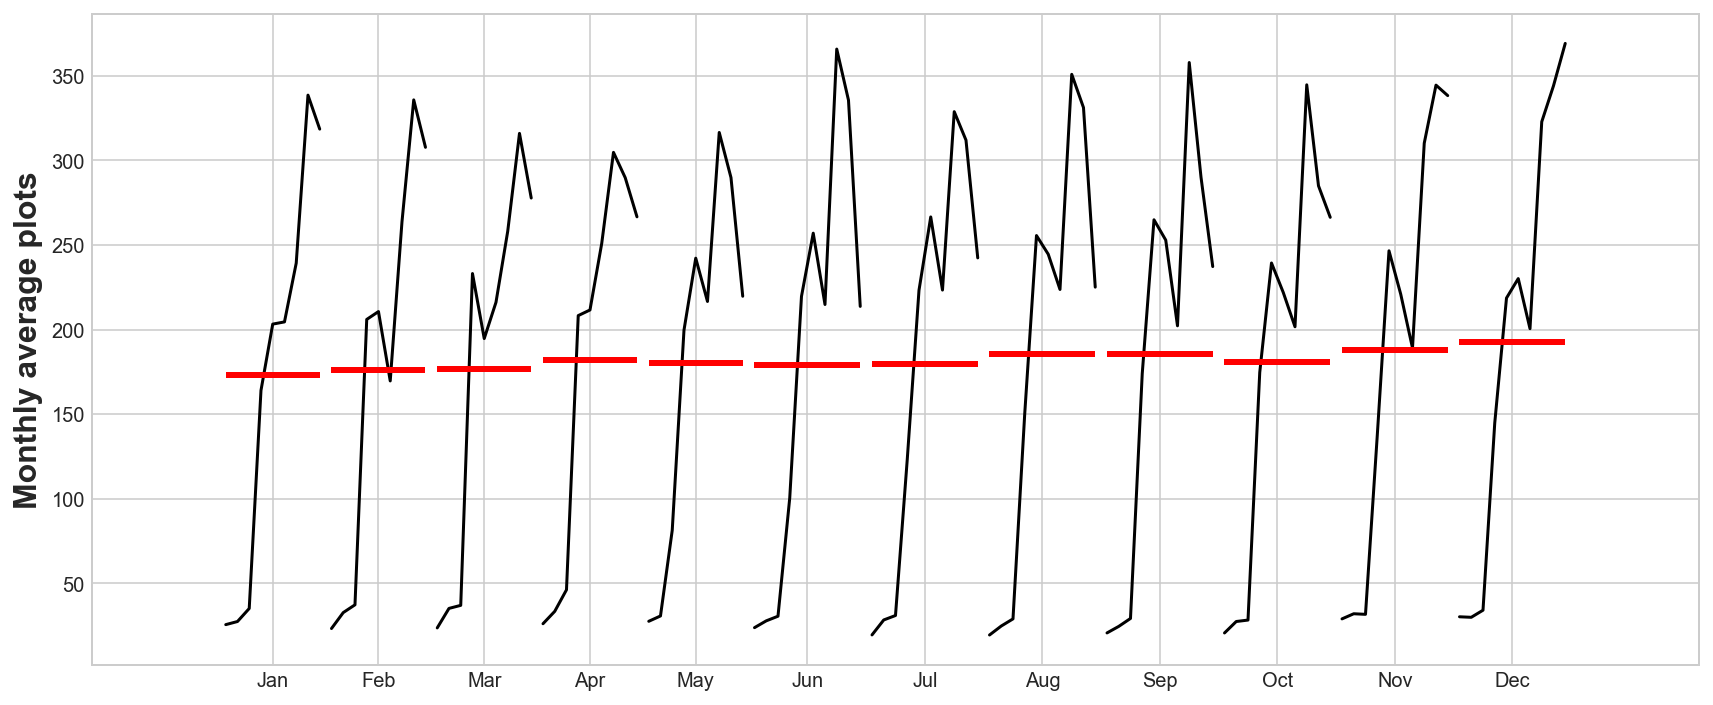

In [23]:
result = month_plot(data['Close'], ylabel= 'Monthly average plots')


In [24]:
decomposed = seasonal_decompose(x = data['Close'], period = 12)

<Figure size 1728x864 with 0 Axes>

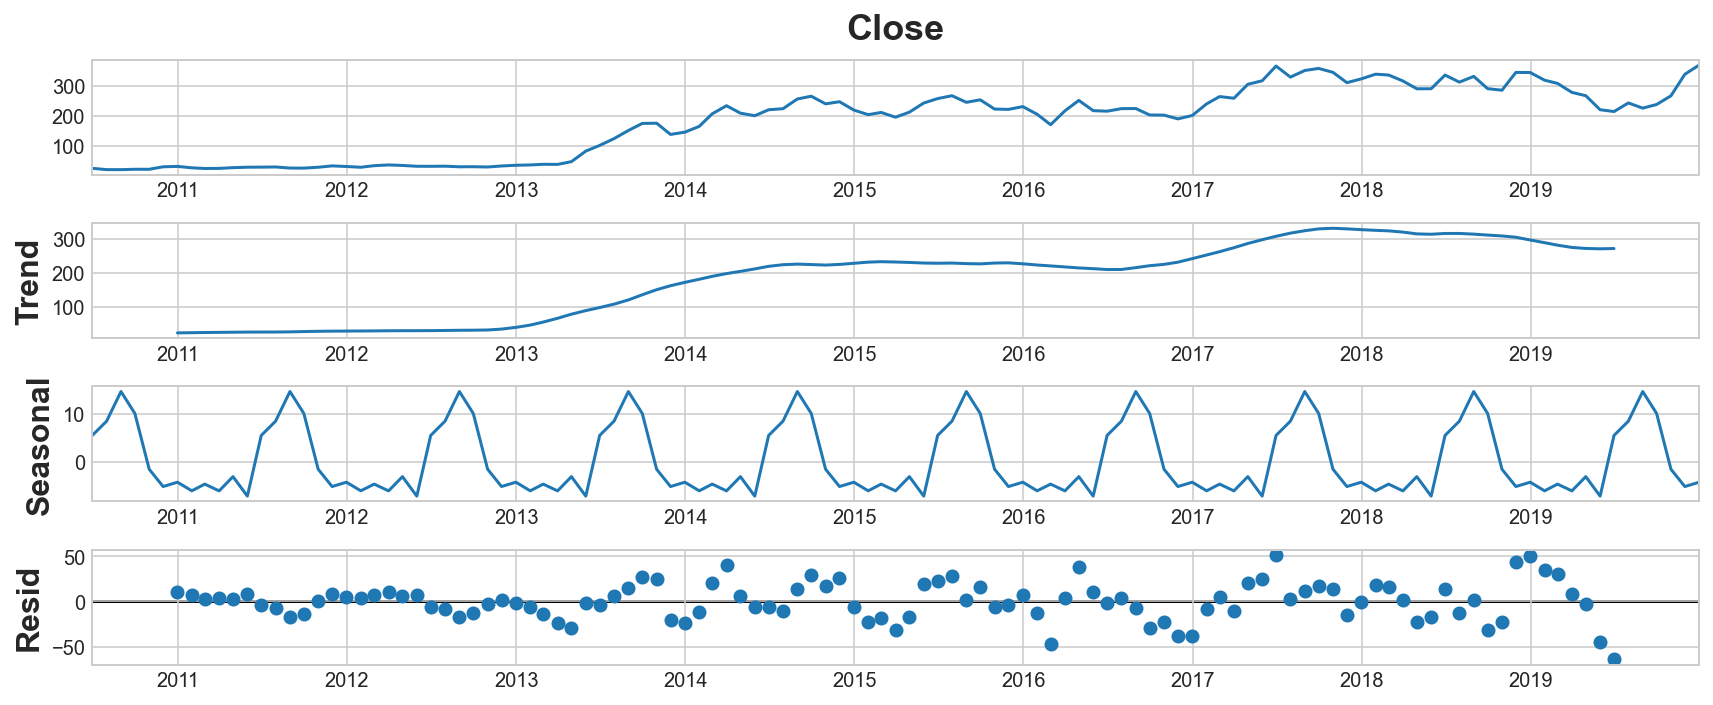

In [25]:
plt.figure(figsize=(24,12))
decomposed.plot();

In [26]:
df['6-MA'] = df['Close'].rolling(6, center =True).mean()
df['12-MA'] = df['Close'].rolling(12, center=True).mean()
df['2-MA'] = df['Close'].rolling(2, center=True).mean()

In [27]:
df.head()

Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

                 6-MA  12-MA       2-MA  
Date                                     
2010-06-29        NaN    NaN        NaN  
2010-06-30        NaN    NaN  23.860000  
2010-07-01        NaN    NaN  22.894999  
2010-07-02  20.131667    NaN  20.580000  
2010-07-06  19.060000    NaN  17.655001

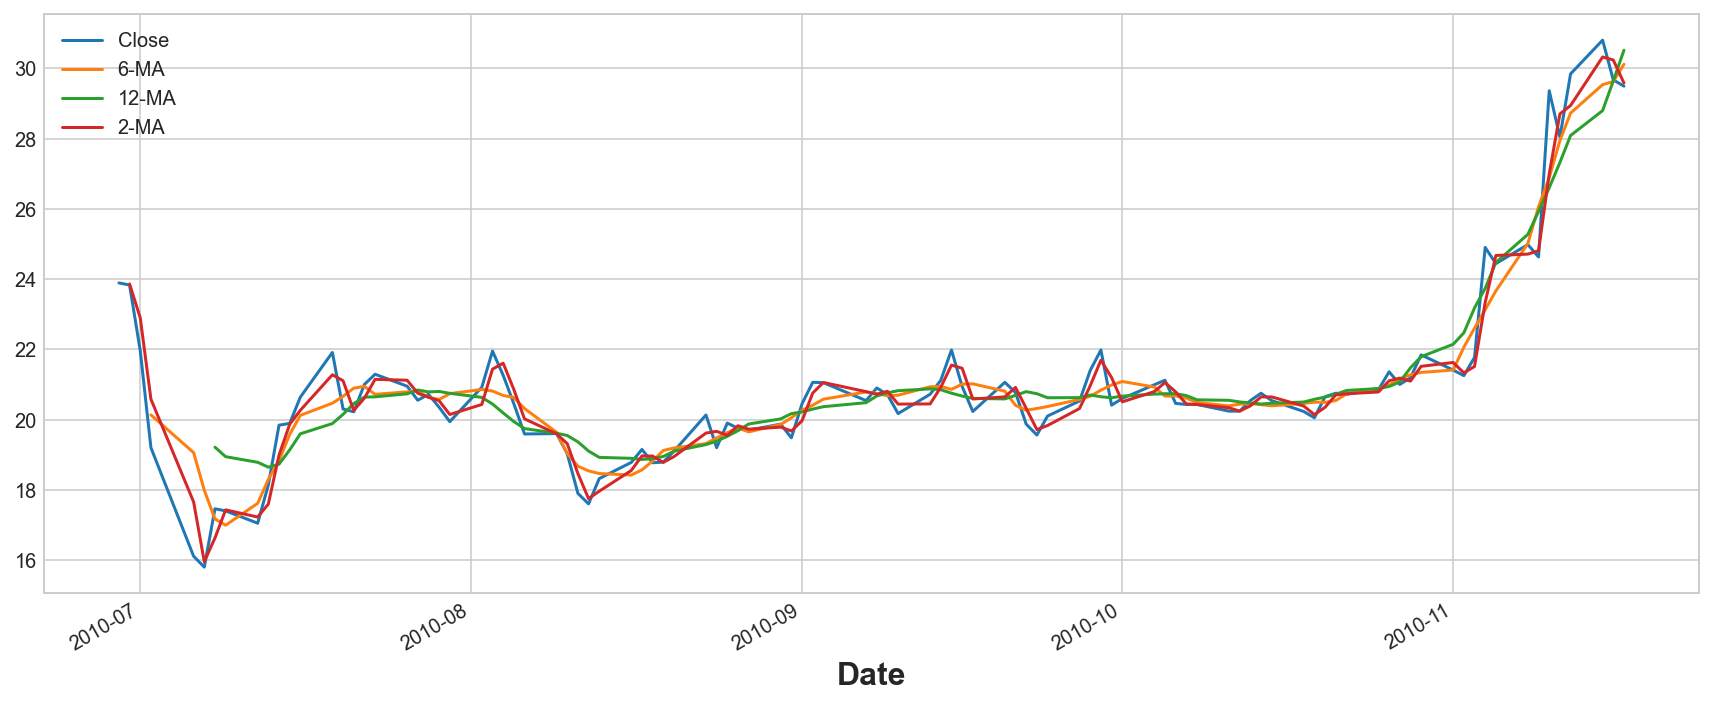

In [28]:
df[['Close', '6-MA', '12-MA', '2-MA']].iloc[:100].plot()
plt.show()

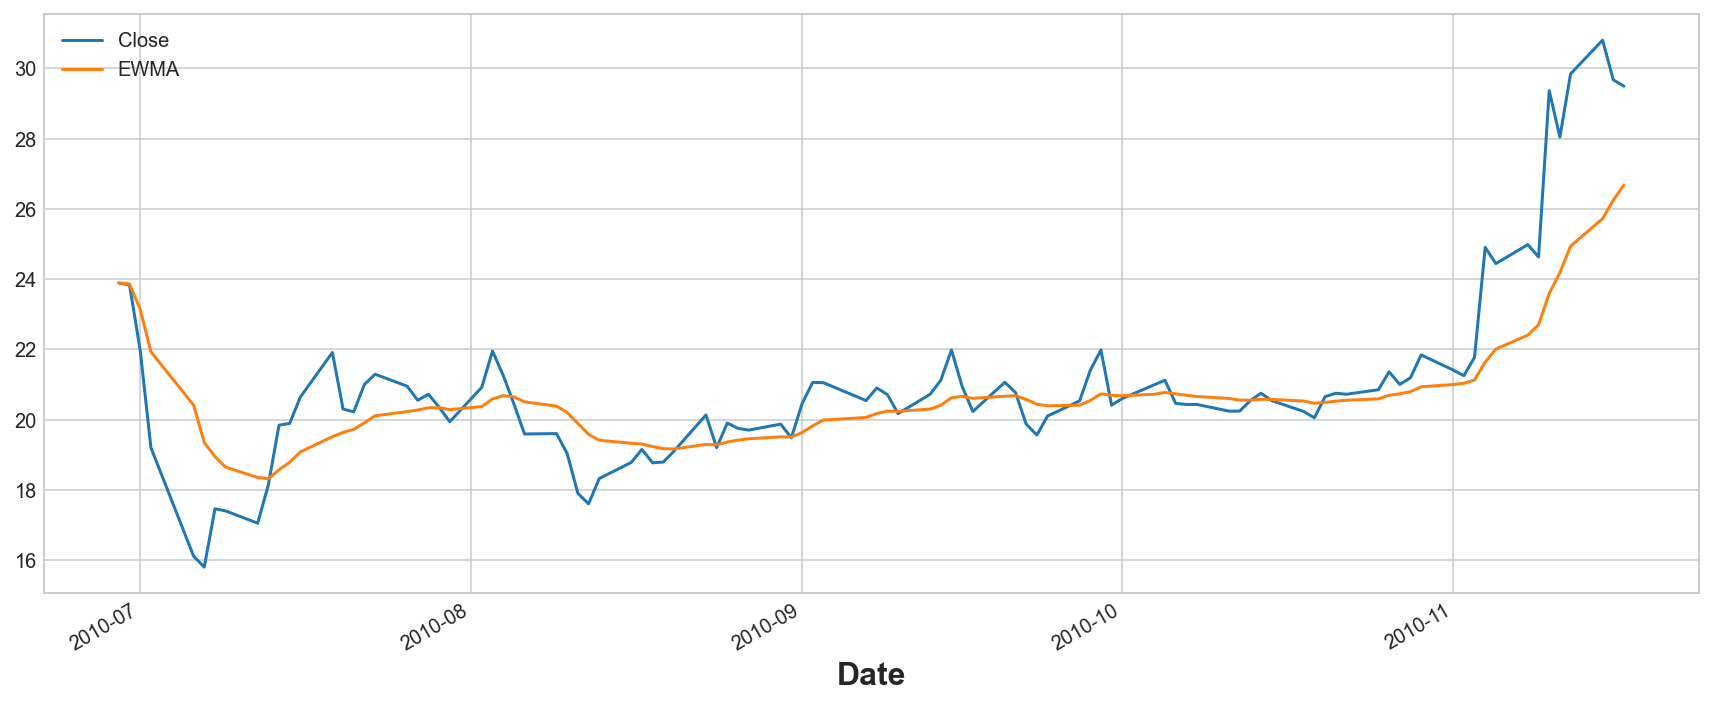

In [29]:
df['EWMA'] = df['Close'].ewm(span=14).mean()

df[['Close', 'EWMA']].iloc[:100].plot()
plt.show()

### Time series modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
from xgboost import XGBRegressor

In [31]:
dp = DeterministicProcess(index = data.index, order = 2, constant=True,drop = True)

X = dp.in_sample()

In [32]:
y = data['Close']

In [33]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [34]:
y_pred = pd.Series(model.predict(X), index = X.index)

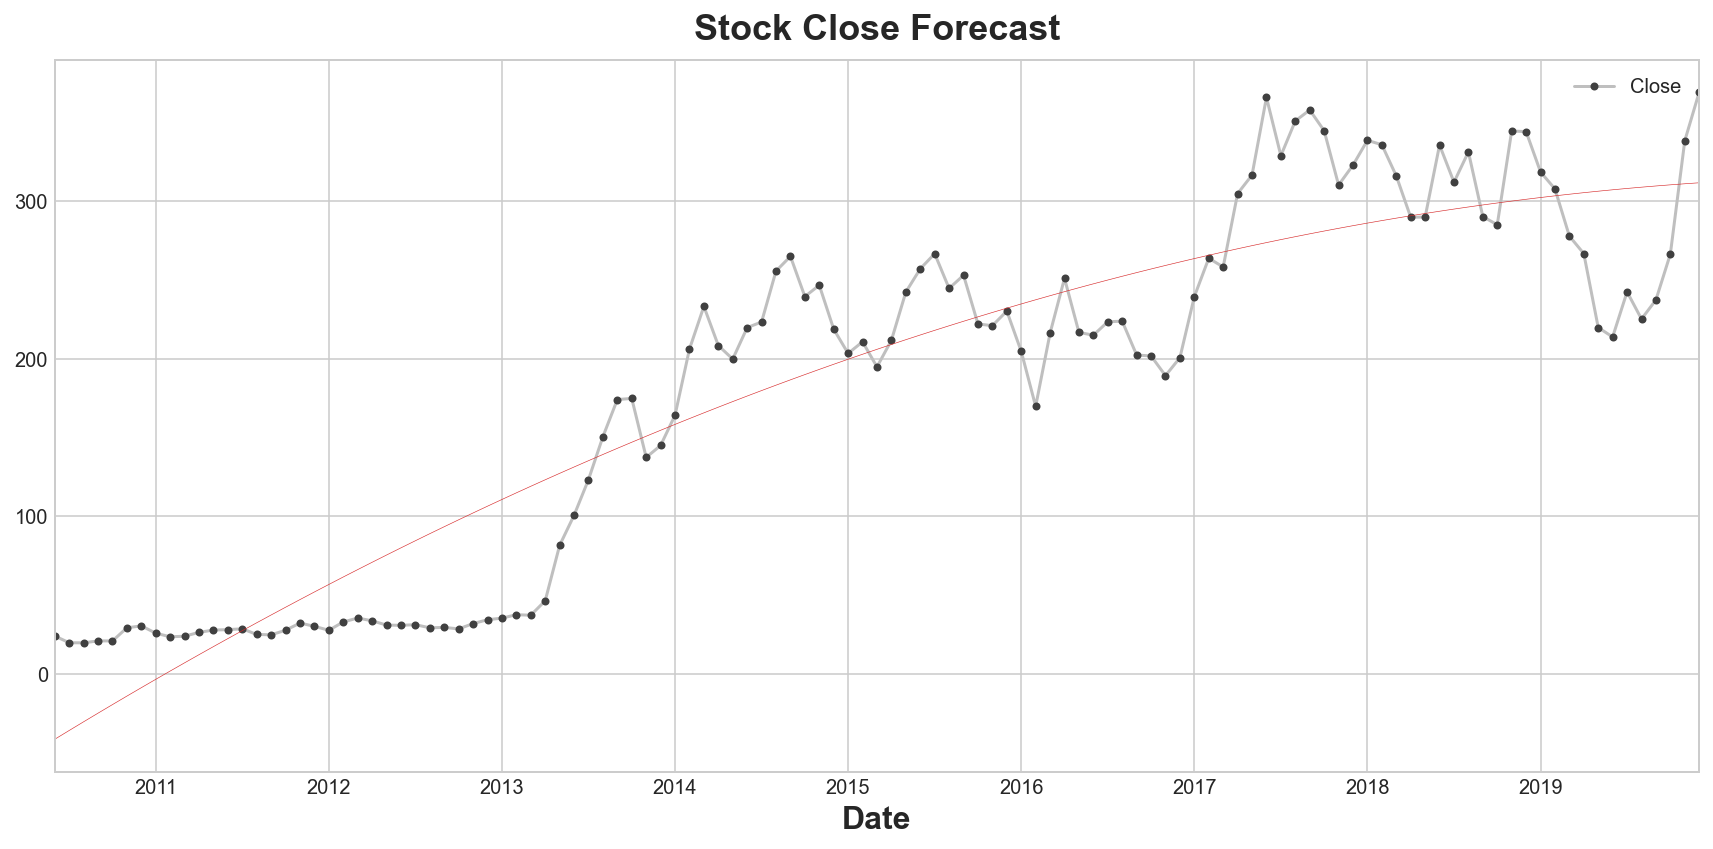

In [35]:
fig, ax = plt.subplots(figsize=(12,6))

ax = y.plot(**plot_params, title = 'Stock Close Forecast')
y_pred.plot(ax = ax, linewidth=0.3, color ='C3', label = 'Prediction')
plt.show()

In [36]:
X_fore = dp.out_of_sample(steps = 30)
y_fore = pd.Series(model.predict(X_fore), index = X_fore.index)

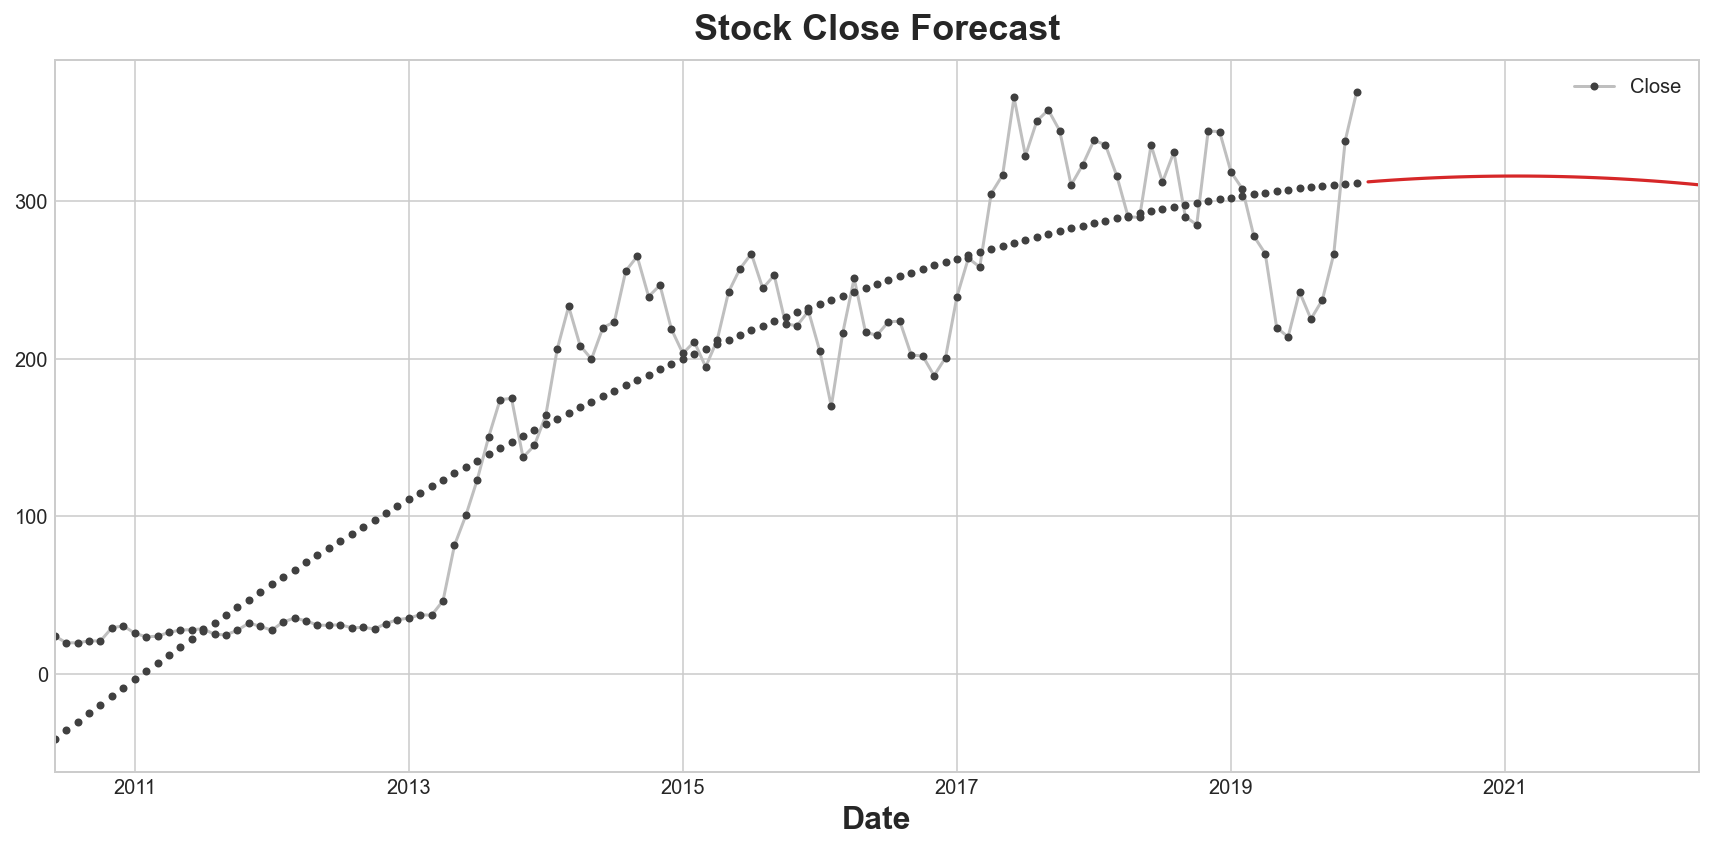

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
ax = y.plot(**plot_params, title ='Stock Close Forecast')
ax = y_pred.plot(color ='0.25', style = '.', label='Prediction')
y_fore.plot(ax = ax, linewidth = 1.6, color = 'C3', label = 'Forecast')
plt.show()

In [38]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-30   22.395001   27.710000   20.420000   23.860000   23.860000   
2010-07-31   20.073334   20.640000   18.816190   19.558095   19.558095   
2010-08-31   19.545455   19.910000   19.080455   19.510909   19.510909   
2010-09-30   20.779048   21.276190   20.309048   20.740476   20.740476   
2010-10-31   20.723333   20.992857   20.425714   20.713333   20.713333   
...                ...         ...         ...         ...         ...   
2019-08-31  225.945456  228.985001  221.659091  225.102727  225.102727   
2019-09-30  237.070501  241.225499  233.058499  237.261498  237.261498   
2019-10-31  263.945218  270.003476  260.628263  266.354784  266.354784   
2019-11-30  338.807001  342.578999  333.889499  338.300000  338.300000   
2019-12-31  365.963888  373.457223  362.561666  369.167779  369.167779   

                  Volume  
Date                      
2010-06-30  1.797670e+07  
2010-07-31  3.075038e+06  
2010-08-31  6.835545e+05  
2010-09-30  8.593286e+05  
2010-10-31  3.118000e+05  
...                  ...  
2019-08-31  6.079750e+06  
2019-09-30  6.788765e+06  
2019-10-31  9.912287e+06  
2019-11-30  7.888540e+06  
2019-12-31  9.913650e+06  

[115 rows x 6 columns]

In [39]:
new_data = data[['Close']]
new_data

Close
Date                  
2010-06-30   23.860000
2010-07-31   19.558095
2010-08-31   19.510909
2010-09-30   20.740476
2010-10-31   20.713333
...                ...
2019-08-31  225.102727
2019-09-30  237.261498
2019-10-31  266.354784
2019-11-30  338.300000
2019-12-31  369.167779

[115 rows x 1 columns]

In [40]:
train_data = new_data[new_data.index <= '2019-08-01']
validation_data = new_data[new_data.index > '2019-08-01'] 
train_data.shape, validation_data.shape

((110, 1), (5, 1))

In [41]:
train_data.index.min(), train_data.index.max()

(Timestamp('2010-06-30 00:00:00', freq='M'),
 Timestamp('2019-07-31 00:00:00', freq='M'))

In [42]:
validation_data.index.min(), validation_data.index.max()

(Timestamp('2019-08-31 00:00:00', freq='M'),
 Timestamp('2019-12-31 00:00:00', freq='M'))

In [43]:
train_data['Target'] = train_data['Close'].shift(-1)
train_data

Close      Target
Date                              
2010-06-30   23.860000   19.558095
2010-07-31   19.558095   19.510909
2010-08-31   19.510909   20.740476
2010-09-30   20.740476   20.713333
2010-10-31   20.713333   29.041905
...                ...         ...
2019-03-31  277.757140  266.655716
2019-04-30  266.655716  219.715454
2019-05-31  219.715454  213.716500
2019-06-30  213.716500  242.382273
2019-07-31  242.382273         NaN

[110 rows x 2 columns]

In [44]:
train_data = train_data.dropna()

In [45]:
validation_data['Target'] = validation_data['Close'].shift(-1)

validation_data

Close      Target
Date                              
2019-08-31  225.102727  237.261498
2019-09-30  237.261498  266.354784
2019-10-31  266.354784  338.300000
2019-11-30  338.300000  369.167779
2019-12-31  369.167779         NaN

In [46]:
validation_data = validation_data.dropna()

In [47]:
X_train = train_data.loc[:, ['Close']]
X_test = validation_data.loc[:, ['Close']]
y_train = train_data.loc[:, 'Target']
y_test = validation_data.loc[:, 'Target']

In [48]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [49]:
y_preds = pd.Series(xgb.predict(X_test), index = X_test.index)

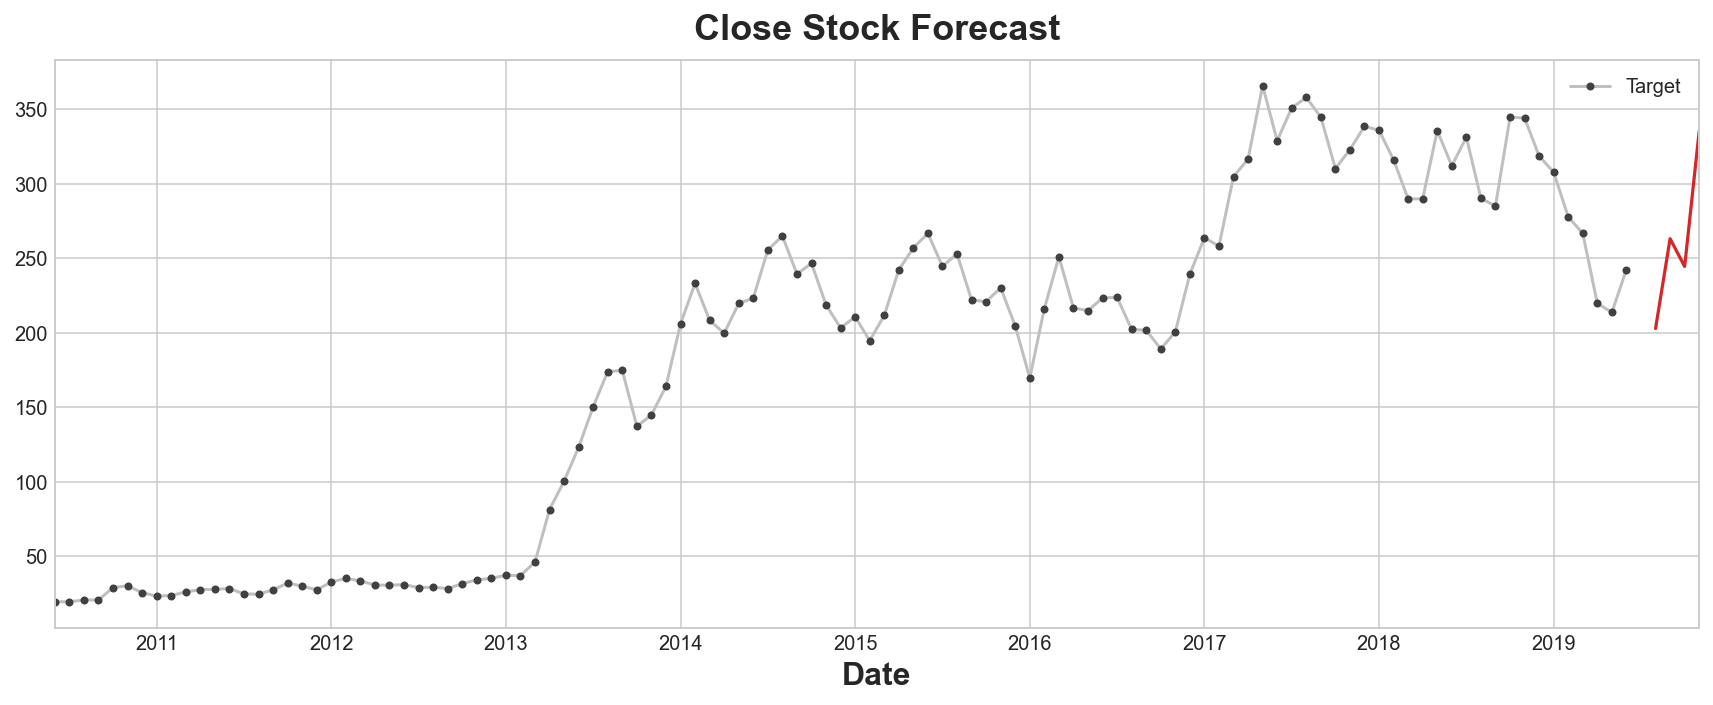

In [50]:
fig, ax = plt.subplots(figsize=(12,5))
ax = y_train.plot(**plot_params, title = 'Close Stock Forecast')
y_preds.plot(ax = ax, linewidth = 1.6, color ='C3', label ='Forecast')
plt.show()

In [51]:
y_preds[0]

202.84721

In [52]:
y_train.index[0]

Timestamp('2010-06-30 00:00:00', freq='M')

In [53]:
X_test.index[0]

Timestamp('2019-08-31 00:00:00', freq='M')